# Aadhar Data Analysis and Application Prototype

This notebook performs a detailed analysis of the Aadhar datasets (Enrolment, Demographic, Biometric) and prototypes the Backend and Frontend components for a Python-based application.

## 1. Import Libraries and Define File Paths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Set plot style
sns.set_style("whitegrid")

# Define base directory
base_dir = r"l:\Adhar_data"

# Define paths to the data folders
# Note: The structure seems to be folder/folder/*.csv based on the workspace info
enrolment_path = os.path.join(base_dir, "api_data_aadhar_enrolment", "api_data_aadhar_enrolment")
demographic_path = os.path.join(base_dir, "api_data_aadhar_demographic", "api_data_aadhar_demographic")
biometric_path = os.path.join(base_dir, "api_data_aadhar_biometric", "api_data_aadhar_biometric")

print(f"Enrolment Path: {enrolment_path}")
print(f"Demographic Path: {demographic_path}")
print(f"Biometric Path: {biometric_path}")

Enrolment Path: l:\Adhar_data\api_data_aadhar_enrolment\api_data_aadhar_enrolment
Demographic Path: l:\Adhar_data\api_data_aadhar_demographic\api_data_aadhar_demographic
Biometric Path: l:\Adhar_data\api_data_aadhar_biometric\api_data_aadhar_biometric


## 2. Load and Consolidate Enrolment Data

In [2]:
enrolment_files = glob.glob(os.path.join(enrolment_path, "*.csv"))
print(f"Found {len(enrolment_files)} enrolment files.")

df_enrolment_list = []
for file in enrolment_files:
    try:
        df = pd.read_csv(file)
        df_enrolment_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if df_enrolment_list:
    df_enrolment = pd.concat(df_enrolment_list, ignore_index=True)
    print(f"Total Enrolment Records: {len(df_enrolment)}")
    display(df_enrolment.head())
else:
    print("No enrolment data found.")
    df_enrolment = pd.DataFrame()

Found 3 enrolment files.
Total Enrolment Records: 1006029


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


## 3. Load and Consolidate Demographic Data

In [3]:
demographic_files = glob.glob(os.path.join(demographic_path, "*.csv"))
print(f"Found {len(demographic_files)} demographic files.")

df_demographic_list = []
for file in demographic_files:
    try:
        df = pd.read_csv(file)
        df_demographic_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if df_demographic_list:
    df_demographic = pd.concat(df_demographic_list, ignore_index=True)
    print(f"Total Demographic Records: {len(df_demographic)}")
    display(df_demographic.head())
else:
    print("No demographic data found.")
    df_demographic = pd.DataFrame()

Found 5 demographic files.
Total Demographic Records: 2071700


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


## 4. Load and Consolidate Biometric Data

In [4]:
biometric_files = glob.glob(os.path.join(biometric_path, "*.csv"))
print(f"Found {len(biometric_files)} biometric files.")

df_biometric_list = []
for file in biometric_files:
    try:
        df = pd.read_csv(file)
        df_biometric_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if df_biometric_list:
    df_biometric = pd.concat(df_biometric_list, ignore_index=True)
    print(f"Total Biometric Records: {len(df_biometric)}")
    display(df_biometric.head())
else:
    print("No biometric data found.")
    df_biometric = pd.DataFrame()

Found 4 biometric files.
Total Biometric Records: 1861108


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


## 5. Data Cleaning and Preprocessing

In [5]:
# Display info to understand column types and missing values
print("--- Enrolment Data Info ---")
if not df_enrolment.empty:
    print(df_enrolment.info())
    # Example cleaning (adjust column names based on actual data)
    # df_enrolment['Date'] = pd.to_datetime(df_enrolment['Date'], errors='coerce')

print("\n--- Demographic Data Info ---")
if not df_demographic.empty:
    print(df_demographic.info())
    # df_demographic['DOB'] = pd.to_datetime(df_demographic['DOB'], errors='coerce')

print("\n--- Biometric Data Info ---")
if not df_biometric.empty:
    print(df_biometric.info())

# Helper function to standardize column names (remove spaces, lowercase)
def clean_columns(df):
    df.columns = df.columns.astype(str).str.strip().str.lower().str.replace(' ', '_')
    return df

if not df_enrolment.empty:
    df_enrolment = clean_columns(df_enrolment)
if not df_demographic.empty:
    df_demographic = clean_columns(df_demographic)
if not df_biometric.empty:
    df_biometric = clean_columns(df_biometric)

print("Columns cleaned.")

--- Enrolment Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB
None

--- Demographic Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
mem

## 6. Exploratory Data Analysis: Enrolment Trends

Using 'date' for trend analysis.


C:\Users\sansk\AppData\Local\Temp\ipykernel_28020\748721918.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  enrolment_trend = df_enrolment.resample('M', on=date_col).size()


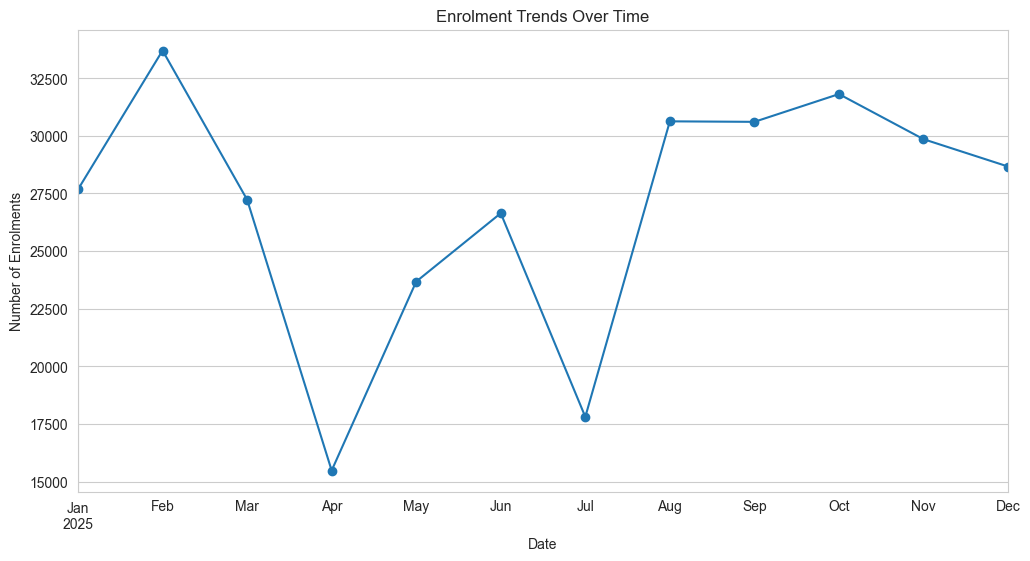

In [6]:
if not df_enrolment.empty:
    # Check for a date column
    date_cols = [col for col in df_enrolment.columns if 'date' in col or 'time' in col]
    
    if date_cols:
        date_col = date_cols[0] # Pick the first likely date column
        print(f"Using '{date_col}' for trend analysis.")
        
        df_enrolment[date_col] = pd.to_datetime(df_enrolment[date_col], errors='coerce')
        
        # Aggregate by month
        enrolment_trend = df_enrolment.resample('M', on=date_col).size()
        
        plt.figure(figsize=(12, 6))
        enrolment_trend.plot(kind='line', marker='o')
        plt.title('Enrolment Trends Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Enrolments')
        plt.grid(True)
        plt.show()
    else:
        print("No date column found for trend analysis.")
        # Attempt to plot by index or another numerical feature
        plt.figure(figsize=(12, 6))
        df_enrolment.reset_index().plot(kind='scatter', x='index', y=df_enrolment.columns[0]) # Fallback
        plt.show()
else:
    print("Enrolment dataframe is empty.")

## 7. Demographic Analysis: Age and Gender Distribution

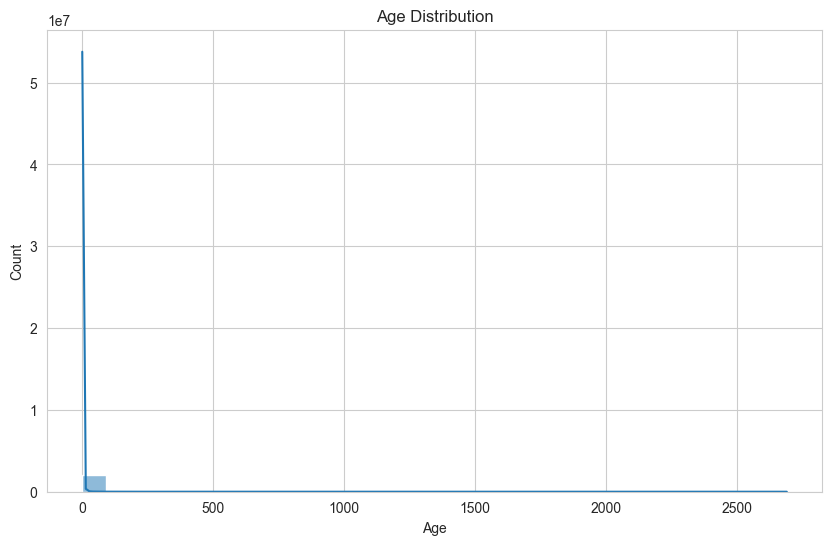

In [7]:
if not df_demographic.empty:
    # Look for age and gender columns
    age_col = next((col for col in df_demographic.columns if 'age' in col), None)
    gender_col = next((col for col in df_demographic.columns if 'gender' in col or 'sex' in col), None)

    if age_col:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_demographic[age_col].dropna(), bins=30, kde=True)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.show()
    
    if gender_col:
        gender_counts = df_demographic[gender_col].value_counts()
        plt.figure(figsize=(8, 8))
        gender_counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title('Gender Distribution')
        plt.ylabel('')
        plt.show()
else:
    print("Demographic dataframe is empty.")

## 8. Biometric Data Analysis: Capture Success Rates

In [8]:
if not df_biometric.empty:
    # Look for status or success columns
    status_col = next((col for col in df_biometric.columns if 'status' in col or 'success' in col), None)

    if status_col:
        status_counts = df_biometric[status_col].value_counts()
        plt.figure(figsize=(10, 6))
        status_counts.plot(kind='bar', color='skyblue')
        plt.title('Biometric Capture Status')
        plt.xlabel('Status')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No status/success column found in biometric data.")
else:
    print("Biometric dataframe is empty.")

No status/success column found in biometric data.


## 9. Correlation Analysis: Demographics vs. Biometric Features

Merging on ['district', 'state', 'pincode', 'date']


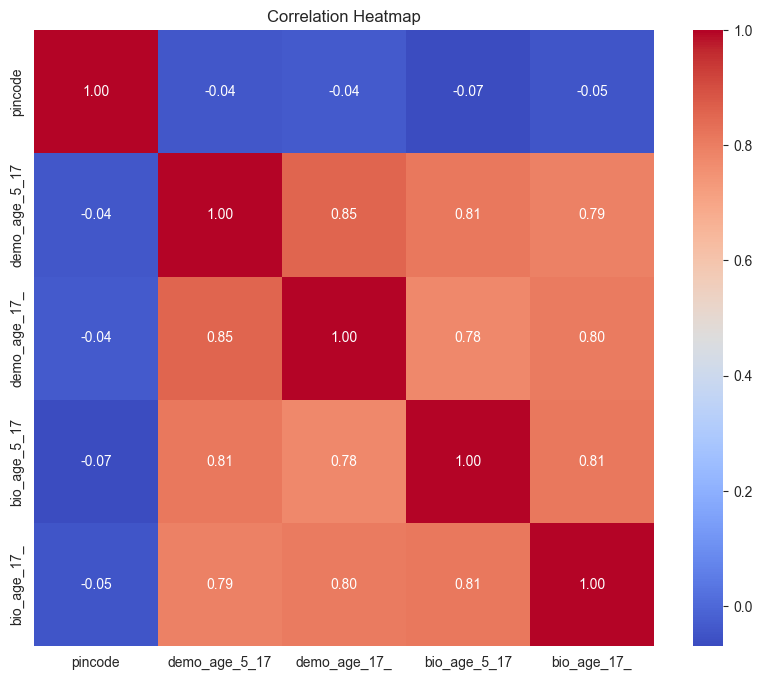

In [10]:
if not df_demographic.empty and not df_biometric.empty:
    # Try to merge on a common ID if available
    # We'll search for common columns.
    common_cols = list(set(df_demographic.columns) & set(df_biometric.columns))
    
    if common_cols:
        print(f"Merging on {common_cols}")
        
        # Use all common columns to avoid Cartesian explosion
        df_merged = pd.merge(df_demographic, df_biometric, on=common_cols, how='inner')
        
        # Calculate correlation matrix for numeric columns
        numeric_df = df_merged.select_dtypes(include=['float64', 'int64'])
        
        if not numeric_df.empty:
            plt.figure(figsize=(10, 8))
            sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
            plt.title('Correlation Heatmap')
            plt.show()
        else:
            print("Not enough numeric data for correlation.")
    else:
        print("No common columns found to merge demographics and biometrics.")
else:
    print("Dataframes missing for correlation analysis.")

## 10. Backend Prototype: Data Query API Wrapper
This section prototypes the backend logic (Service Layer). In a real application, this would be part of a FastAPI or Flask application.

In [11]:
class AadharDataService:
    def __init__(self, enrolment_df, demographic_df, biometric_df):
        self.enrolment_df = enrolment_df
        self.demographic_df = demographic_df
        self.biometric_df = biometric_df
    
    def get_stats(self):
        return {
            "total_enrolments": len(self.enrolment_df),
            "total_demographics": len(self.demographic_df),
            "total_biometrics": len(self.biometric_df)
        }
    
    def get_demographics_by_age_range(self, min_age, max_age):
        if self.demographic_df.empty:
            return []
        
        # Identify age column again
        age_col = next((col for col in self.demographic_df.columns if 'age' in col), None)
        if not age_col:
            return "Age column not found"
            
        filtered = self.demographic_df[(self.demographic_df[age_col] >= min_age) & (self.demographic_df[age_col] <= max_age)]
        return filtered.to_dict(orient='records')

# Initialize Service
service = AadharDataService(df_enrolment, df_demographic, df_biometric)

# Test Service
print("Stats:", service.get_stats())
# Example usage:
# print("Sample Demographics (20-25):", service.get_demographics_by_age_range(20, 25)[:5])

Stats: {'total_enrolments': 1006029, 'total_demographics': 2071700, 'total_biometrics': 1861108}


## 11. Frontend Prototype: Streamlit Dashboard Demo
We will generate a `app.py` file which can be run using `streamlit run app.py` in the terminal.
This application will load the data and provide an interactive dashboard.

In [12]:
streamlit_code = """
import streamlit as st
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
st.set_page_config(page_title="Aadhar Data Dashboard", layout="wide")

# --- Data Loading (Cached) ---
@st.cache_data
def load_data():
    base_dir = r"l:\Adhar_data"
    enrolment_path = os.path.join(base_dir, "api_data_aadhar_enrolment", "api_data_aadhar_enrolment")
    demographic_path = os.path.join(base_dir, "api_data_aadhar_demographic", "api_data_aadhar_demographic")
    biometric_path = os.path.join(base_dir, "api_data_aadhar_biometric", "api_data_aadhar_biometric")
    
    def read_folder(path):
        files = glob.glob(os.path.join(path, "*.csv"))
        df_list = []
        for file in files:
            try:
                df_list.append(pd.read_csv(file))
            except:
                pass
        return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

    df_enrolment = read_folder(enrolment_path)
    df_demographic = read_folder(demographic_path)
    df_biometric = read_folder(biometric_path)
    
    # Generic Cleaning
    for df in [df_enrolment, df_demographic, df_biometric]:
        if not df.empty:
            df.columns = df.columns.astype(str).str.strip().str.lower().str.replace(' ', '_')
            
    return df_enrolment, df_demographic, df_biometric

df_enrolment, df_demographic, df_biometric = load_data()

# --- Sidebar ---
st.sidebar.title("Navigation")
options = st.sidebar.radio("Go to", ["Home", "Enrolment Analysis", "Demographics", "Biometrics"])

# --- Pages ---
if options == "Home":
    st.title("Aadhar Data Analysis Dashboard")
    st.write("Welcome to the dashboard. Use the sidebar to navigate.")
    
    col1, col2, col3 = st.columns(3)
    col1.metric("Total Enrolments", len(df_enrolment))
    col2.metric("Total Demographics", len(df_demographic))
    col3.metric("Total Biometrics", len(df_biometric))

elif options == "Enrolment Analysis":
    st.header("Enrolment Trends")
    if not df_enrolment.empty:
        st.dataframe(df_enrolment.head())
        # Add plotting logic here if date columns exist
    else:
        st.warning("No Enrolment Data Found")

elif options == "Demographics":
    st.header("Demographic Insights")
    if not df_demographic.empty:
        # Age Distribution
        age_col = next((col for col in df_demographic.columns if 'age' in col), None)
        if age_col:
            st.subheader("Age Distribution")
            fig, ax = plt.subplots()
            sns.histplot(df_demographic[age_col], kde=True, ax=ax)
            st.pyplot(fig)
    else:
        st.warning("No Demographic Data Found")

elif options == "Biometrics":
    st.header("Biometric Analysis")
    if not df_biometric.empty:
        st.dataframe(df_biometric.head())
    else:
        st.warning("No Biometric Data Found")

"""

with open("l:\\Adhar_data\\app.py", "w") as f:
    f.write(streamlit_code)

print("Streamlit app generated as 'l:\\Adhar_data\\app.py'")
print("Run it with: streamlit run l:\\Adhar_data\\app.py")

Streamlit app generated as 'l:\Adhar_data\app.py'
Run it with: streamlit run l:\Adhar_data\app.py


<>:15: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
C:\Users\sansk\AppData\Local\Temp\ipykernel_28020\452345169.py:15: SyntaxWarning: invalid escape sequence '\A'
  base_dir = r"l:\Adhar_data"


In [13]:
import sys
print(sys.executable)

C:\Users\sansk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe
